In [1]:
import numpy as np
from graphqec import CssCode, ThresholdLAB

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix, hstack, kron, eye

def repetition_code(n):
    """
    Parity check matrix of a repetition code with length n.
    """
    row_ind, col_ind = zip(*((i, j) for i in range(n) for j in (i, (i+1)%n)))
    data = np.ones(2*n, dtype=np.uint8)
    return csc_matrix((data, (row_ind, col_ind)))


def toric_code_stabilisers(L1, L2):
    """
    Sparse check matrix for the X stabilisers of a toric code with
    lattice size L, constructed as the hypergraph product of
    two repetition codes.
    """
    Hr1 = repetition_code(L1)
    Hr2 = repetition_code(L2)
    Hx= hstack(
            [kron(Hr1, eye(Hr2.shape[1])), kron(eye(Hr1.shape[0]), Hr2.T)],
            dtype=np.uint8
        )
    Hx.data = Hx.data % 2
    Hx.eliminate_zeros()
    
    Hz= hstack(
            [kron(eye(Hr1.shape[0]), Hr2), kron(Hr1.T, eye(Hr2.shape[1]))],
            dtype=np.uint8
        )
    Hz.data = Hz.data % 2
    Hz.eliminate_zeros()
    return Hx, Hz

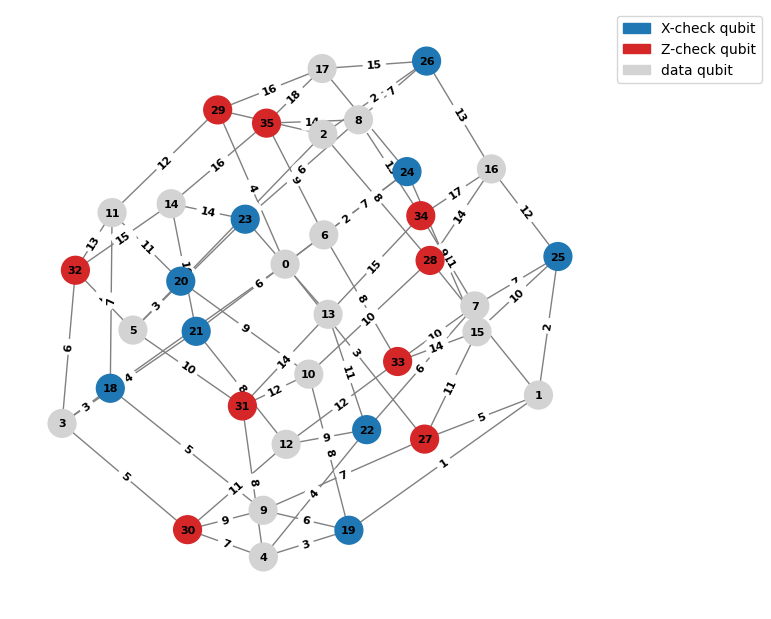

In [5]:
l = 3
Hx, Hz = toric_code_stabilisers(l, l)
Hx = np.asarray(Hx.todense())
Hz = np.asarray(Hz.todense())

tc = CssCode(Hx, Hz, name="Toric")

tc.draw_graph()

In [ ]:
configurations = []

for l in [4, 8, 12]:
    Hx, Hz = toric_code_stabilisers(l, l)
    Hx = np.asarray(Hx.todense())
    Hz = np.asarray(Hz.todense())
    configurations.append({"Hx": Hx, "Hz": Hz, "name": f"Toric"})

th = ThresholdLAB(
    configurations = configurations,
    code = CssCode,
    error_rates = np.linspace(0.001, 0.01, 10),
    decoder='pymatching'
)

th.collect_stats(
    num_workers = 4,
    max_shots = 10**5,
    max_errors= 1000,
    logic_check="Z"
)

th.plot_stats()